In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/Customer Churn.csv")

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Setp 1 -

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we replacing blank to 0 as tenure is 0 and no total charges are recorded

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
#checking Null value or not
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# check duplicay
df.duplicated().sum()

0

Create 0 and  1 to yes / no in SeniorCitizen to make easier


In [ ]:

def  conv(value):
  if value ==1:
    return "yes"

  else:
    return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

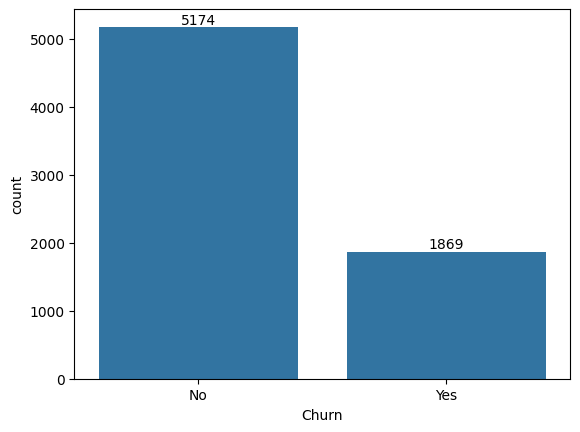

In [ ]:
ax = sns.countplot(x='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.show()

Here we check how many customer are chruned

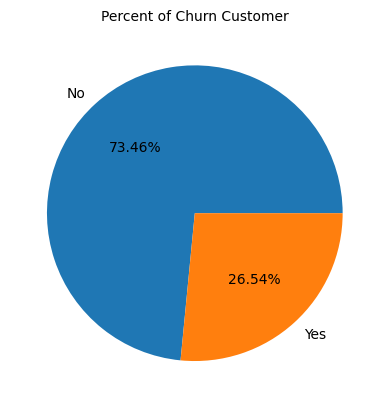

In [ ]:
gb = df.groupby('Churn').agg({'Churn':"count"})
gb
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percent of Churn Customer", fontsize = 10 )
plt.show()

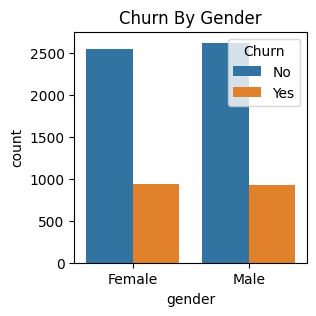

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=df, hue="Churn")
plt.title("Churn By Gender")
plt.show()

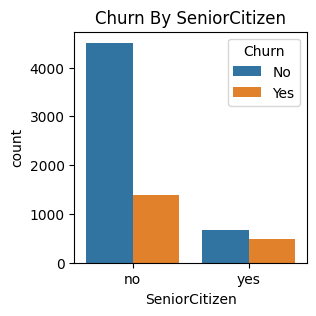

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='SeniorCitizen',data=df, hue="Churn")
plt.title("Churn By SeniorCitizen")
plt.show()

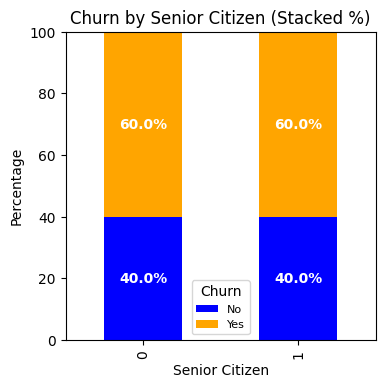

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute count of Churn within each SeniorCitizen group
df_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentage
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = df_percent.plot(kind='bar', stacked=True, figsize=(4, 4), color=['blue', 'orange'])

# Add percentage labels inside bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid labeling zero values
            ax.annotate(f'{height:.1f}%',
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Styling
plt.title("Churn by Senior Citizen (Stacked %)", fontsize=12)
plt.xlabel("Senior Citizen", fontsize=10)
plt.ylabel("Percentage", fontsize=10)
plt.ylim(0, 100)  # Ensure percentage scale
plt.legend(title="Churn", fontsize=8)

# Show plot
plt.show()


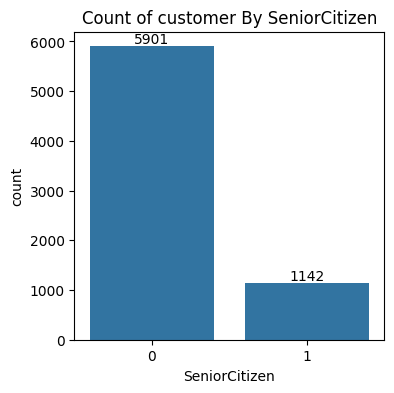

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer By SeniorCitizen")
plt.show()

comparative a greater % of people senior citizen  category have changed


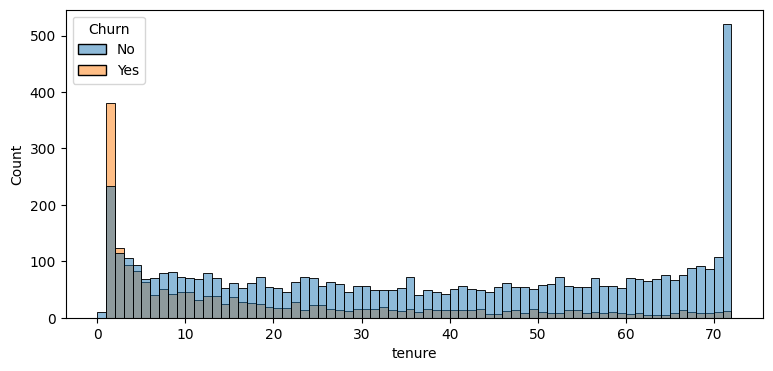

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df, bins=72, hue="Churn")
plt.show()

#people who have used our service for a long time they stay more than others who use our service 1 or 2 months

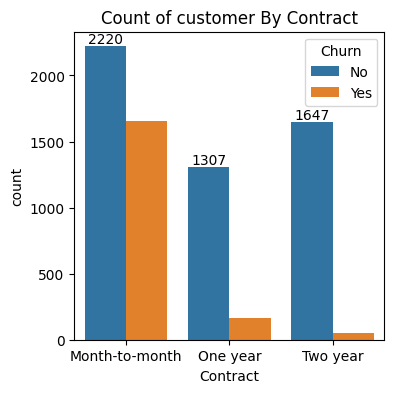

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract',data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer By Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract  

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

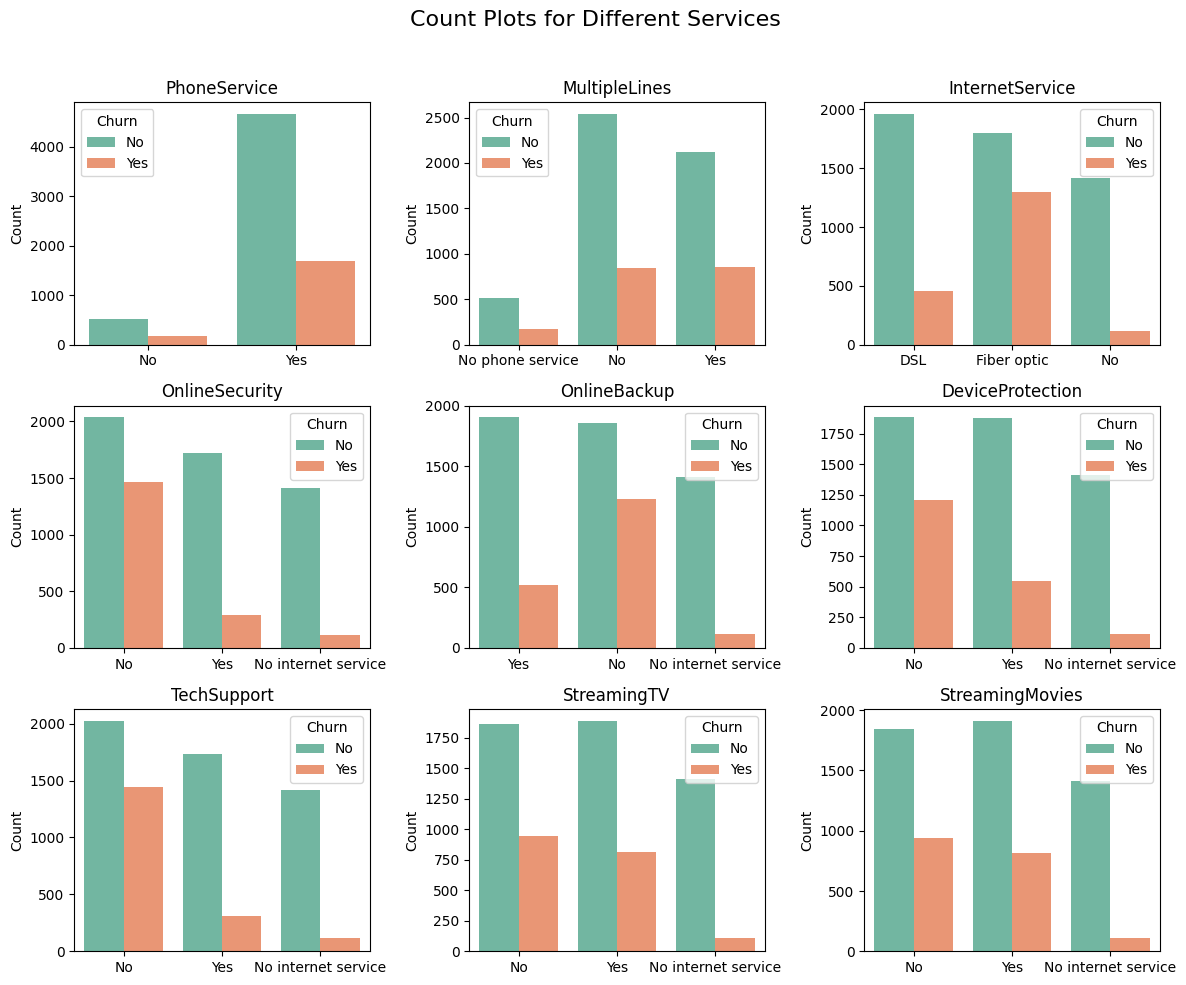

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define number of rows and columns for subplots
n_rows = 3  # Adjust as needed
n_cols = 3  # Adjust as needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,10))
fig.suptitle("Count Plots for Different Services", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot countplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="Set2", hue=df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plots
plt.show()


Lack of support services, online security, and backup increases churn, with fiber optic users showing the highest churn, while streaming services have minimal impact.

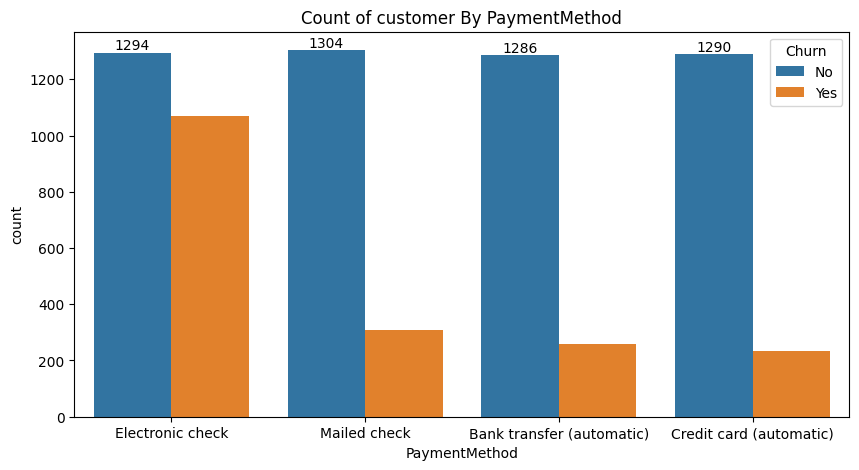

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='PaymentMethod',data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer By PaymentMethod")
plt.show()

#customer is likely to churn when he is using electronics check as a payment method
